# This notebook takes table cells cropped in Extract-Cells-training.ipynb notebook and augments them and saves as .npy files

In [16]:
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, MaxPool2D
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dense, Dropout, Activation


def get_file_path_list(path):  
    full_path_list = []
    for path, subdirs, files in os.walk(path):
        for filename in files:
            f = os.path.join(path, filename)
            full_path_list.append(f)
    return full_path_list

In [109]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

'''
Takes X_train, augments it, and adds to the existing data X_mn.
The number of newly generated images is equal to batchs*iteration
'''
def augment_mnist(X_mn, y_mn,X_train,y_train, batchs, iteration):
    kk=1
    X_mn = X_mn/255
    datagen = ImageDataGenerator(
            rotation_range=20,
#             width_shift_range=0.2,
#             height_shift_range=0.2,
#             rescale=1./255,
#             shear_range=0.2,
#             zoom_range= 0.2,
            width_shift_range=0.05,
            height_shift_range=0.05,
            rescale=1./255,
#             rescale=None,
            shear_range=0.05,
            zoom_range= 0.05,
            horizontal_flip=False,
            fill_mode='nearest')
    # fit parameters from data
    datagen.fit(X_train)
    # configure batch size and retrieve one batch of images
    for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batchs, save_to_dir='aug', save_prefix='aug', save_format='png'):
        X_mn = np.concatenate([X_mn,X_batch])
        y_mn = np.concatenate([y_mn,y_batch])
        kk +=1
        if kk>iteration:
            break
        
    return X_mn, y_mn

In [110]:
def border(im, bordersize):
    row, col = im.shape[:2]
    bottom = im[row-2:row, 0:col]
    mean = cv2.mean(bottom)[0]

    border_img = cv2.copyMakeBorder(
        im,
        top=bordersize,
        bottom=bordersize,
        left=bordersize,
        right=bordersize,
        borderType=cv2.BORDER_CONSTANT,
        value=[mean, mean, mean]
    )
    return border_img

# Aggregate

In [90]:
!rm all_combined_march27.zip/.DS_Store

rm: cannot remove ‘all_combined_march27.zip/.DS_Store’: Not a directory


In [111]:
image_files = get_file_path_list('all_combined_march27')
npimages = np.empty((0, 28, 28), dtype=np.float32)
nplabels = np.empty((0,), dtype=np.int32)

for f in image_files:
    im_gray = cv2.imread(f)
    try:
        im_gray = cv2.cvtColor(im_gray, cv2.COLOR_BGR2GRAY)
    except:
        continue
#     im_gray = border(im_gray, 5) #########
    im_gray = im_gray/255
    dim = (28, 28)
    im_gray = cv2.resize(im_gray, dim, interpolation = cv2.INTER_AREA)
    im_gray =im_gray.reshape(1, 28, 28)
    label = int(f.split('/')[-1].split('-')[0])
    nplabels = np.append(nplabels , label)
    npimages = np.append(npimages, im_gray, axis=0)
    
npimages = npimages.astype('float32')
nplabels = nplabels.astype('uint8')

In [76]:
f

'all_combined_march27/10-190.jpg'

In [74]:
!rm all_combined_march27/7-184.jpg

In [112]:
print('npimages', npimages.shape)
print('nplabels', nplabels.shape)

print('npimages dtype', npimages.dtype)
print('nplabels dtype', nplabels.dtype)

npimages (12612, 28, 28)
nplabels (12612,)
npimages dtype float32
nplabels dtype uint8


In [93]:
!ls all_combined_march27 | wc -l

12613


4

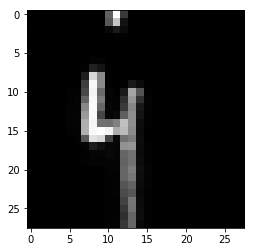

In [94]:
i = 4
plt.figure()
plt.imshow(npimages[i].reshape(npimages.shape[1],im_gray.shape[2]),cmap='Greys')
nplabels[i]

In [85]:
npimages.shape

(12612, 28, 28)

# Augment data and add to itself

In [115]:
!rm -rf aug/
!mkdir aug
x = npimages.reshape(npimages.shape[0], 28, 28, 1)
x_train, x_test, y_train, y_test = train_test_split(x, nplabels, test_size = 0.2)

x_train, y_train = augment_mnist(x_train, y_train,x_train, y_train, 100, 3000)
x_test, y_test = augment_mnist(x_test, y_test,x_test, y_test, 100, 900)

In [117]:
np.save('x_train_new_spd_300k.npy', x_train) # save
np.save('x_test_new_spd_300k.npy', x_test) # save

np.save('y_train_new_spd_300k.npy', y_train) # save
# np.save('y_test_comb_clean_120k_shift1.npy', y_test) # save
np.save('y_test_new_spd_300k.npy', y_test) # save

In [106]:
x_train.shape

(10089, 28, 28, 1)

In [99]:
x_train[1000]

array([[[0.9884464 ],
        [0.9907352 ],
        [0.9895908 ],
        [0.9917438 ],
        [0.98688596],
        [0.9903537 ],
        [0.9771371 ],
        [0.9780236 ],
        [0.98684824],
        [0.9834559 ],
        [0.9904743 ],
        [0.9897868 ],
        [0.9838886 ],
        [0.9875765 ],
        [0.98274726],
        [0.98406804],
        [0.9863085 ],
        [0.99188703],
        [0.98987275],
        [0.99663335],
        [0.9880936 ],
        [0.98765033],
        [0.9930239 ],
        [0.9892395 ],
        [0.98856556],
        [0.9843741 ],
        [0.9890329 ],
        [0.9835448 ]],

       [[0.99842453],
        [0.99892205],
        [0.9986733 ],
        [0.9988844 ],
        [0.99808526],
        [0.99883914],
        [0.99782896],
        [0.9980401 ],
        [0.9985451 ],
        [0.99940455],
        [0.9997739 ],
        [0.99868834],
        [0.99850744],
        [0.9991256 ],
        [0.99926883],
        [0.9984547 ],
        [0.9986205 ],
        